By implementing classification algorithms we'll build a robust model that accurately predicts forest cover types for diverse geographical regions. This project offers valuable insights into the environmental sciences, promoting informed decision-making for sustainable forestry practices, biodiversity conservation, and ecosystem protection.

# Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore') 

# Loading the Dataset

In [2]:
df = pd.read_csv("C://Users/piyus/Desktop/Forest Cover Type Prediction Envisioning Nature's Canopy/covtype.csv")

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


# Exploration of Dataset

In [4]:
dfx = df.copy()

In [5]:
dfx.shape

(581012, 55)

In [6]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
dfx.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [8]:
print(dfx.describe())

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

In [9]:
dfx.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

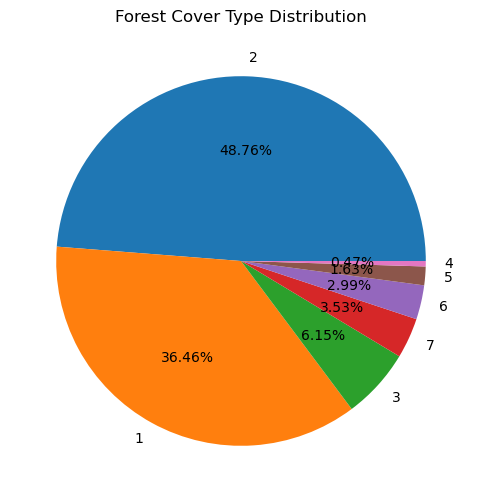

In [10]:
plt.figure(figsize=(6,6))
plt.pie(dfx.Cover_Type.value_counts().values, labels = dfx.Cover_Type.value_counts().keys(), autopct='%.2f%%')
plt.title("Forest Cover Type Distribution")
plt.show() 

 By exploring the data, we found that the data is well organized with no null values and equal number of rows in every features colummns. The values contained within Cover_Type, is numerically-encoded categorical data. If we head over to the column descriptions on the Forest Cover Type Dataset page, it says that:

1 = "Spruce/Fir",
2 = "Lodgepole Pine", 
3 = "Ponderosa Pine", 
4 = "Cottonwood/WIllow", 
5 = "Aspen", 
6 = "Douglas-fir", and 
7 = "Krummholz".

In [11]:
(dfx[:]==1).sum()

Elevation                                  0
Aspect                                  1671
Slope                                   3680
Horizontal_Distance_To_Hydrology           0
Vertical_Distance_To_Hydrology          6938
Horizontal_Distance_To_Roadways            0
Hillshade_9am                              0
Hillshade_Noon                             0
Hillshade_3pm                             15
Horizontal_Distance_To_Fire_Points         0
Wilderness_Area1                      260796
Wilderness_Area2                       29884
Wilderness_Area3                      253364
Wilderness_Area4                       36968
Soil_Type1                              3031
Soil_Type2                              7525
Soil_Type3                              4823
Soil_Type4                             12396
Soil_Type5                              1597
Soil_Type6                              6575
Soil_Type7                               105
Soil_Type8                               179
Soil_Type9

In [12]:
cont_data=dfx.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_data=dfx.loc[:,'Wilderness_Area1':'Soil_Type40']

Wilderness_data=dfx.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

Soil_data=dfx.loc[:,'Soil_Type1':'Soil_Type40']

# cont_data - Data without binary features i.e continuous features
# binary_Data - Data having all binary features [Wilderness Areas + Soil Types]
# wilderness_Data - Wilderness Areas
# Soil_Data - Binary Soil Types

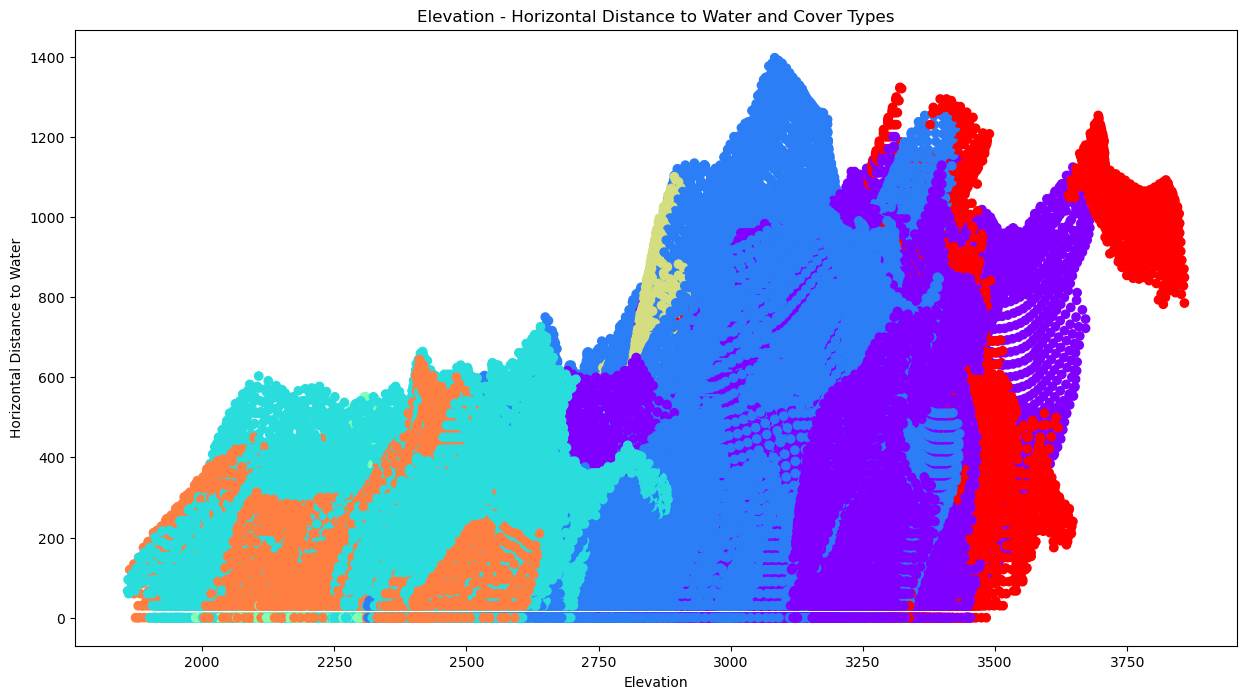

In [67]:
plt.figure(figsize=(15,8))
plt.scatter(dfx["Elevation"], dfx["Horizontal_Distance_To_Hydrology"],c=dfx["Cover_Type"],cmap="rainbow")
plt.title('Elevation - Horizontal Distance to Water and Cover Types')
plt.xlabel('Elevation')
plt.ylabel('Horizontal Distance to Water')
plt.show()

In [13]:
#finding features having less than 1000 occurances
print('Soil Type',' Occurence_count')
for col in binary_data:
    count=binary_data[col].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(col,count)

Soil Type  Occurence_count
Soil_Type7 105
Soil_Type8 179
Soil_Type14 599
Soil_Type15 3
Soil_Type21 838
Soil_Type25 474
Soil_Type28 946
Soil_Type36 119
Soil_Type37 298


<Axes: >

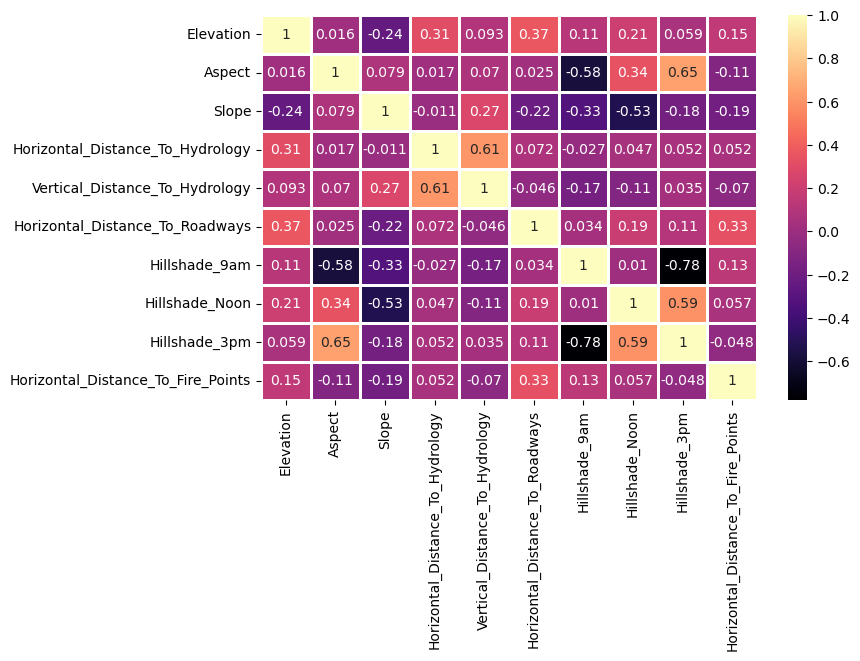

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)


# Data Modelling

In [15]:
x = dfx.loc[:,'Elevation':'Soil_Type40']
y = dfx['Cover_Type']

In [16]:
print(x.shape)
print(y.shape)

(581012, 54)
(581012,)


In [17]:
remove=['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15', 'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

In [18]:
x.drop(remove, axis=1, inplace=True)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [31]:
MLA = []
Z = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB() ,RandomForestClassifier() , 
     GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB" ,"RandomForestClassifier" , 
     "GradientBoostingClassifier", "KNN"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( x_train , y_train )
    pred = model.predict(x_test)
    MLA.append(accuracy_score(pred , y_test))

d = { "Algorithm" : X, "Accuracy" : MLA }

dfm = pd.DataFrame(d)
dfm

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\piyus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Algorithm,Accuracy
0,LinearSVC,0.595769
1,DecisionTreeClassifier,0.935670
2,LogisticRegression,0.607640
3,GaussianNB,0.456685
4,RandomForestClassifier,0.955331
5,GradientBoostingClassifier,0.772788


In [28]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs = -1)


In [29]:
knn.fit(x_train,y_train)
Accuracy=knn.score(x_test,y_test)
print('KNN Accuracy:',Accuracy)

KNN Accuracy: 0.9651815219386819


In [44]:
predict = knn.predict([[2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5]])

In [48]:
Cover_Type_List = ["Invalid Input","Spruce/Fir","Lodgepole Pine","Ponderosa Pine","Cottonwood/WIllow","Aspen", "Douglas-fir", "Krummholz"]

In [55]:
Cover_Type_List[int(predict)]

'Lodgepole Pine'

In [57]:
knn.score(x_test,y_test)

0.9651815219386819

In [66]:
Accuracy

0.9651815219386819

In [68]:
predicted = knn.predict(x_test)

In [69]:
predicted
pre = pd.DataFrame(data=predicted, columns=['Pre'])
pre

,Pre
0,1
1,5
2,1
3,1
4,1
...,...
174299,1
174300,2
174301,2
174302,2


In [70]:
Y_test = pd.DataFrame(data=y_test)
yy_test = Y_test.reset_index()
yy_test.drop(columns=['index'])

,Cover_Type
0,1
1,5
2,1
3,1
4,1
...,...
174299,1
174300,2
174301,2
174302,2


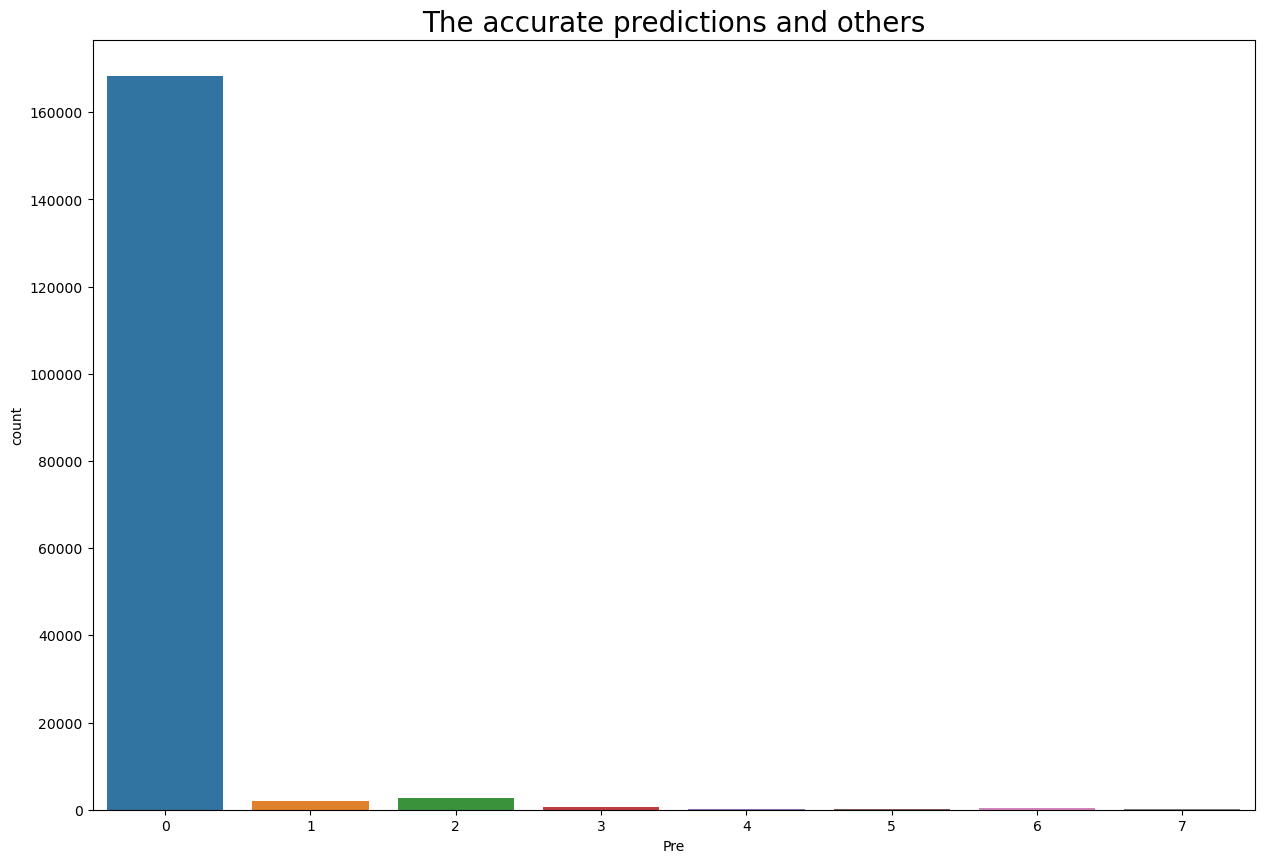

In [71]:
hold = pd.DataFrame(columns=['Pre'])
a = []
counter = 0
for i in range(0,174304):
    if pre['Pre'][i] != yy_test['Cover_Type'][i]:
        a.append(pre['Pre'][i])
        counter = counter + 1
    else:
        a.append(0)
        counter = counter + 1

hold['Pre'] = a
A = range(0,174304)
plt.figure(figsize=(15,10))
sns.countplot(x='Pre', data=hold)
plt.title('The accurate predictions and others', fontsize=20)
plt.show()

In [72]:
accurate = 0
not_accurate = 0
for i in A:
    if hold['Pre'][i] == 0:
        accurate = accurate + 1
    else:
        not_accurate = not_accurate + 1

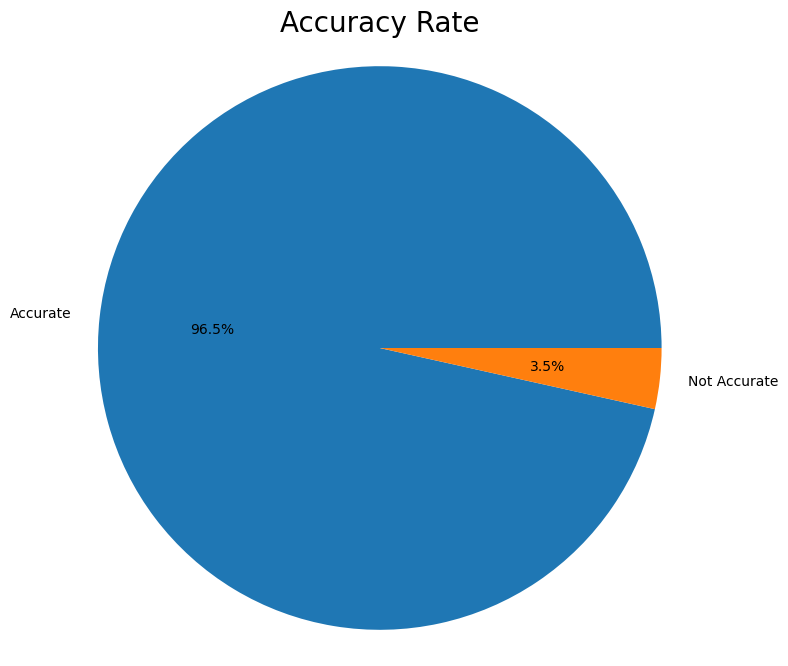

In [73]:
labels = 'Accurate', 'Not Accurate'
sizes = [accurate, not_accurate]

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,8)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Accuracy Rate', fontsize=20)
plt.show()